# 3 Levels of Analysis

* Level 0 : Getting Started
* Level 1 : Univariate Analysis
* Level 2 : Bi-variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from the data

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import statistics as st
import plotly.express as px

In [138]:
df=pd.read_csv('Loandata.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
print(df.columns) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [4]:
df.isnull().sum() 

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [5]:
(100*df.isnull().sum())/df.shape[0]

SK_ID_CURR              0.000
TARGET                  0.000
NAME_CONTRACT_TYPE      0.000
GENDER                  0.000
Car                     0.000
House                   0.000
CNT_CHILDREN            0.000
AMT_INCOME_TOTAL        0.000
AMT_CREDIT              0.000
AMT_GOODS_PRICE         0.081
NAME_TYPE_SUITE         0.405
NAME_INCOME_TYPE        0.000
NAME_EDUCATION_TYPE     0.000
NAME_FAMILY_STATUS      0.000
DAYS_EMPLOYED           0.000
MOBILE                  0.000
WORK_PHONE              0.000
HOME_PHONE              0.000
MOBILE_REACHABLE        0.000
FLAG_EMAIL              0.000
OCCUPATION_TYPE        31.224
CNT_FAM_MEMBERS         0.001
APPLICATION_DAY         0.000
TOTAL_DOC_SUBMITTED     0.000
dtype: float64

# LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types.

### Following are the kinds of analysis that can be performed on categorical data:
1. Check if the variable is  Nominal or Ordinal.
2. Check how many categories are present in a variable.
3. Check the Mode of a variable.
4. Check for Missing values of a variable.
5. Think how the missing values could be treated.
6. What kind of graph/chart can be plotted using this data?

Note: We are analyzing only one column at a time (a.k.a. Univariate Analysis)

# Separating Categorical and Numerical Variables

In [6]:
a=df.select_dtypes(exclude='object')
b=df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

table=[b_lst,a_lst]
print(tabulate({"Categorical":b_lst,
               "continuous":a_lst},headers=['Categorical','continuous']))

Categorical          continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


# User defined functions for level 1 analysis of categorical columns
This function will check for the following:

Unique values 

Mode 

Sum of all the null values

Total count of missing values

In [7]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

# Analysis of Target Column


In [8]:
df["TARGET"].describe()

count    100000.000000
mean          0.080930
std           0.272729
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

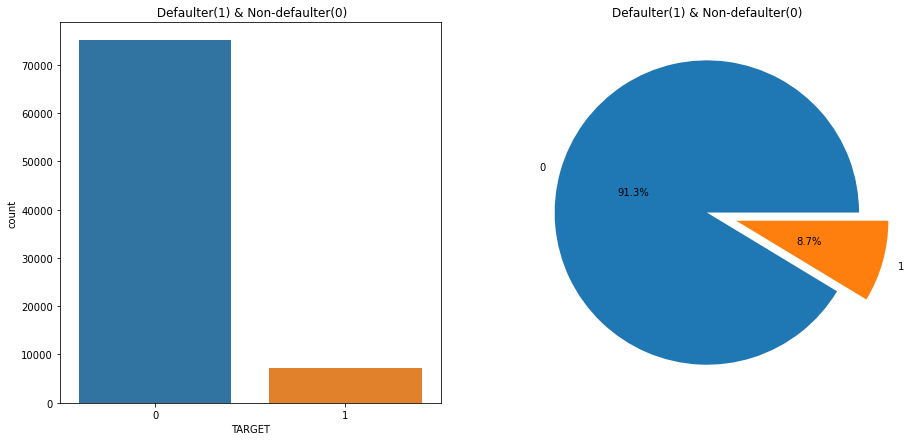

In [133]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title(" Defaulter(1) & Non-defaulter(0)")                  # Set the title of the graph
percentage = df["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TARGET"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.title('Defaulter(1) & Non-defaulter(0)')
plt.pie(x=percentage,autopct = "%.1f%%",explode=[0.0,0.2],labels = labels, pctdistance = 0.5);  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


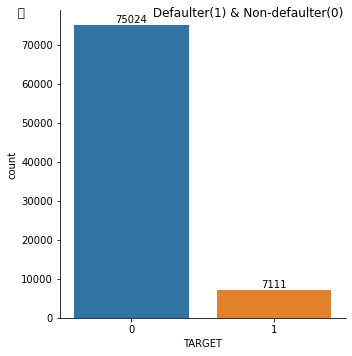

In [132]:
Targ=sns.catplot(data=df,x='TARGET',kind='count')
Targ.fig.suptitle('  \t                                 Defaulter(1) & Non-defaulter(0)')
ax = Targ.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

In [109]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,Laborers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,586,1,1,0,1,0,Laborers,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,Laborers,2.0,SATURDAY,1


### Conclusion:Around 8.09% of the clients are irregular with their credit payments

# Analysis of Gender

In [139]:
df['GENDER']=df['GENDER'].replace(['XNA'],'F')

In [140]:
df["GENDER"].describe()

count     100000
unique         2
top            F
freq       65858
Name: GENDER, dtype: object

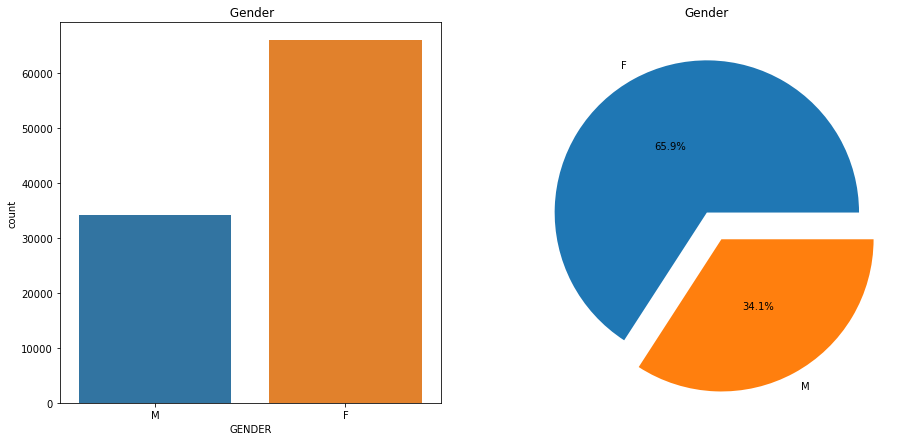

In [148]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title(" Gender")                  # Set the title of the graph
percentage = df["GENDER"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["GENDER"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.title('Gender')
plt.pie(x=percentage,autopct = "%.1f%%",explode=[0.0,0.2],labels = labels, pctdistance = 0.5);  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

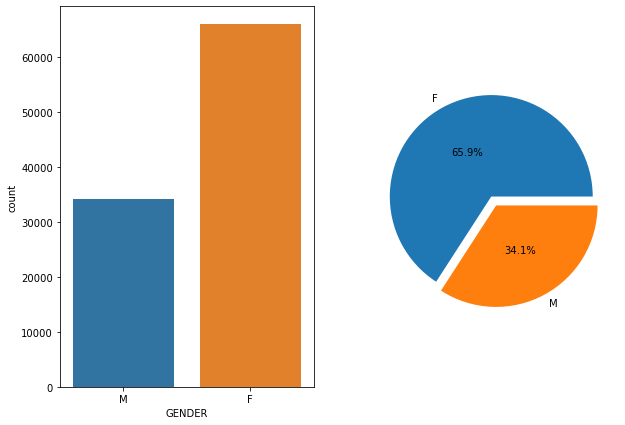

In [147]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
data= df["GENDER"].value_counts()                                                                                        
labels =data.keys()                                                  
sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(x=data,explode=[0,0.1], autopct = "%.1f%%", labels = labels, pctdistance = 0.5);

### Conclusion=65% of the client are females.

In [12]:
#Analysis of NAME_CONTRACT_TYPE  Column


In [13]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


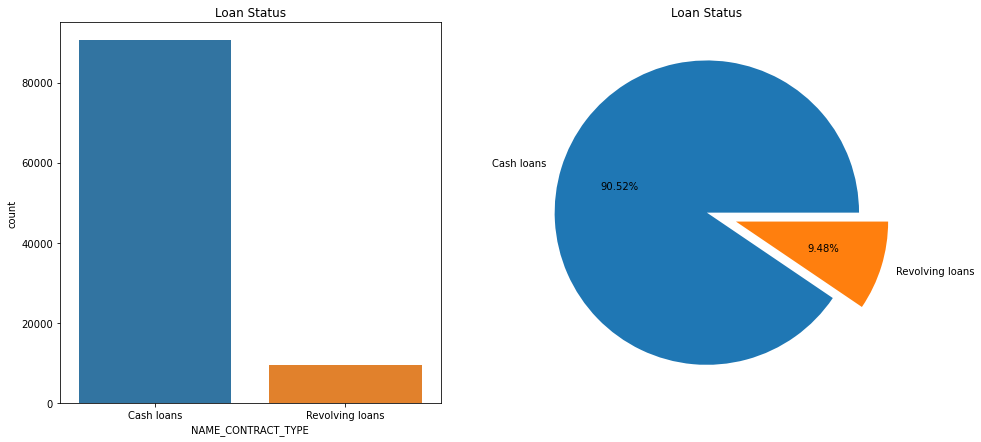

In [151]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Loan Status")                  # Set the title of the graph
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.title('Loan Status')
plt.pie(percentage,labels = labels,explode=[0.0,0.2], autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### conclusion=over 90.52% are cash loans and 9.48% are revolving loans.

# Analysis of Car Column1

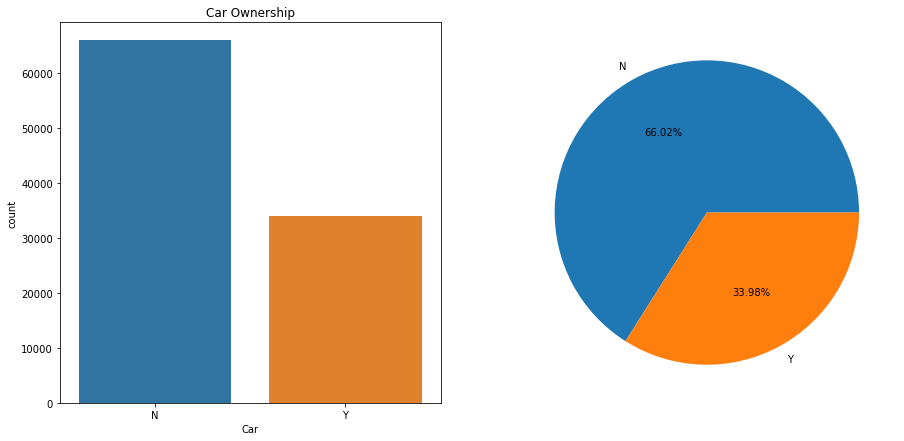

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Car Ownership")                  # Set the title of the graph
percentage = df["Car"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Car"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion:Only 33.98% of the clients own a car.

# Analysis of House Column

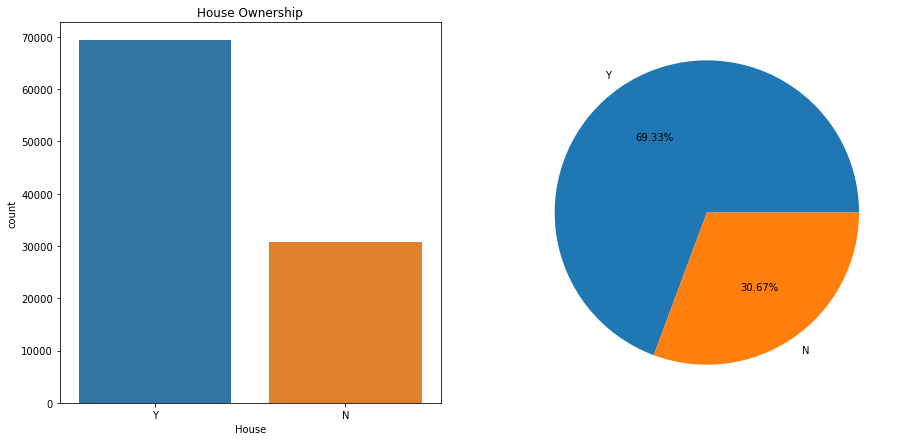

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('House Ownership')                  # Set the title of the graph
percentage = df["House"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["House"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion: Majority of the clients i.e around 70% of them own a house.

# Analysis of NAME_INCOME_TYPE Column

In [17]:
 info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


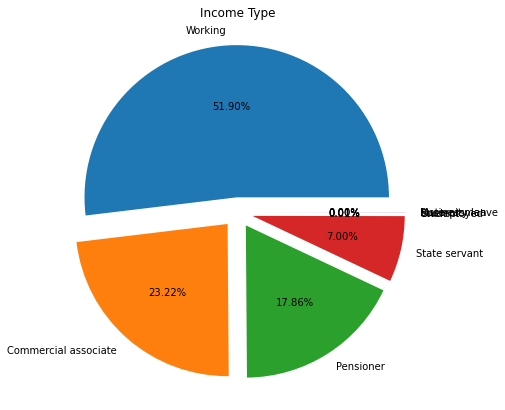

In [18]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Income Type')                  # Set the title of the graph
percentage = df["NAME_INCOME_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_INCOME_TYPE"].value_counts().index) # Converting the index of value counts into list


plt.pie(percentage,labels = labels, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion: Majority of the clients are working professionals

# Analysis of OCCUPATION_TYPE Column

In [19]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


In [20]:
occ_mode = df.OCCUPATION_TYPE.mode()[0]
print(occ_mode)
df["OCCUPATION_TYPE"].fillna(occ_mode, inplace = True)

Laborers


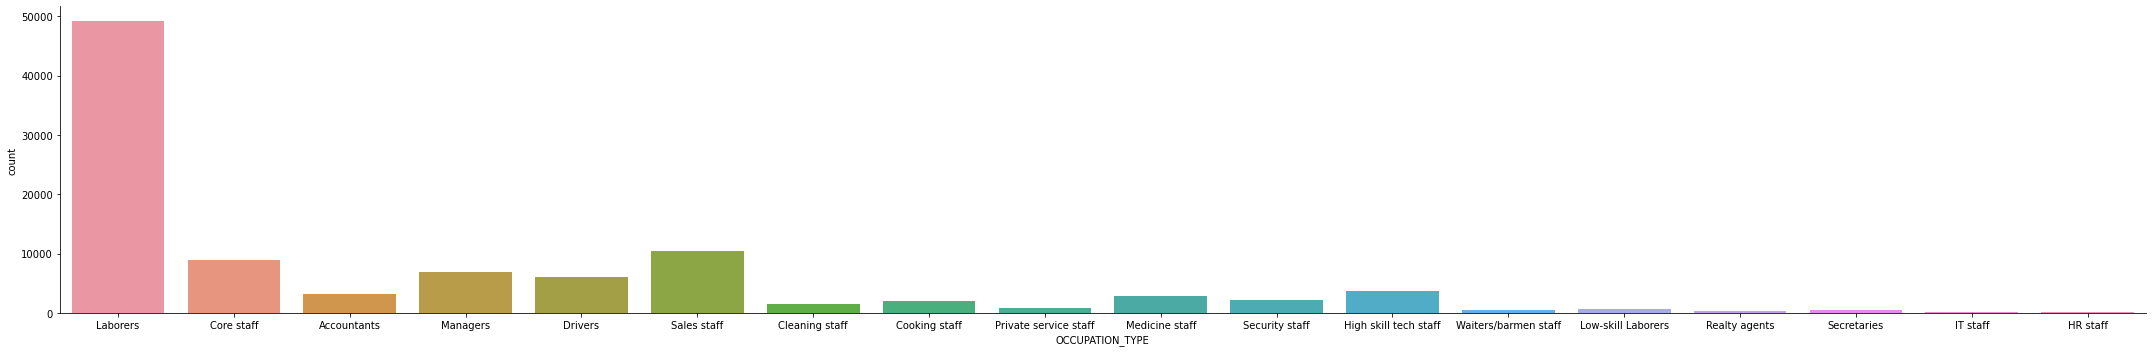

In [21]:
sns.catplot(data=df,x = "OCCUPATION_TYPE",kind='count',aspect=6);

### Conclusion: Majority of the Clients' occupation is Laborer.

# Analysis of MOBILE_REACHABLE Column

In [22]:
info_of_cat("MOBILE_REACHABLE")

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


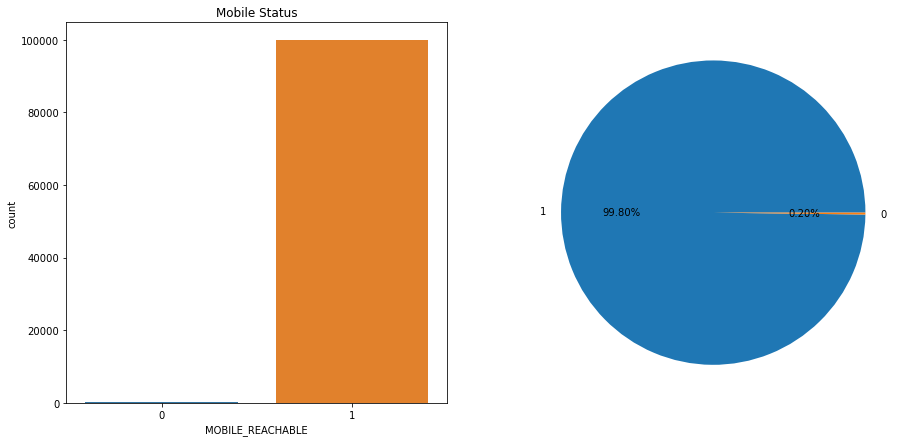

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('Mobile Status')                  # Set the title of the graph
percentage = df["MOBILE_REACHABLE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["MOBILE_REACHABLE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["MOBILE_REACHABLE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion: Almost all the clients' mobile was reachable

# Analysis of CNT_CHILDREN Column

In [24]:
info_of_cat("CNT_CHILDREN")

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


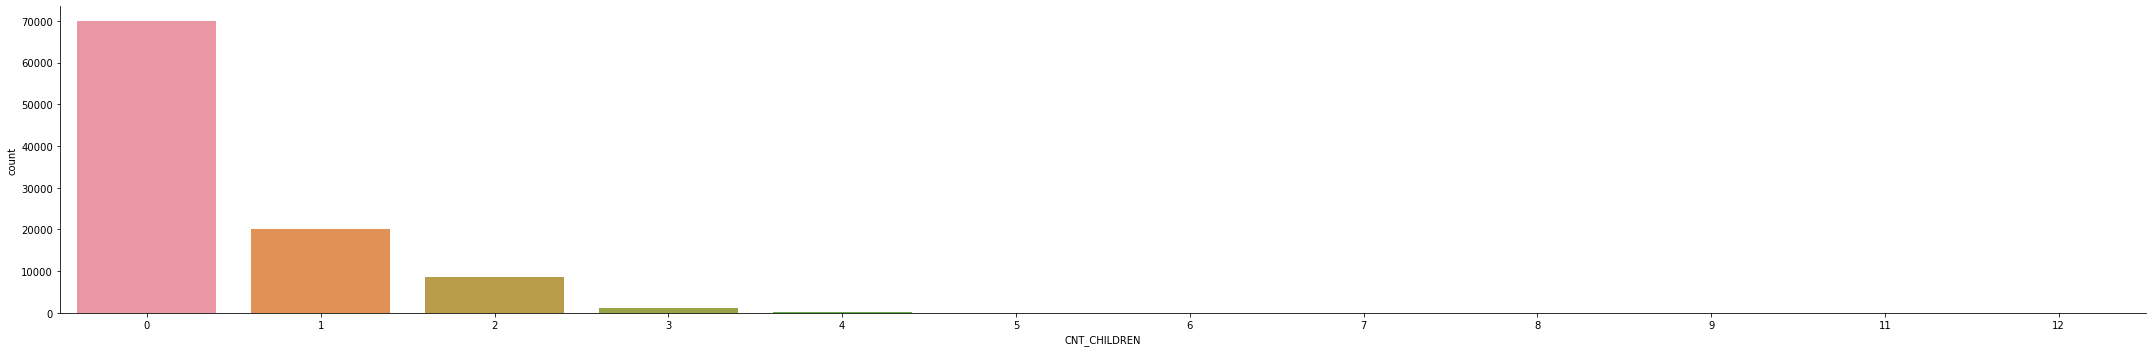

In [25]:
sns.catplot(data=df,x = "CNT_CHILDREN",kind='count',aspect=6);

### Conclusion:Majority of the clients have atmost 3 children

# Analysis of FLAG_EMAIL Column

In [26]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


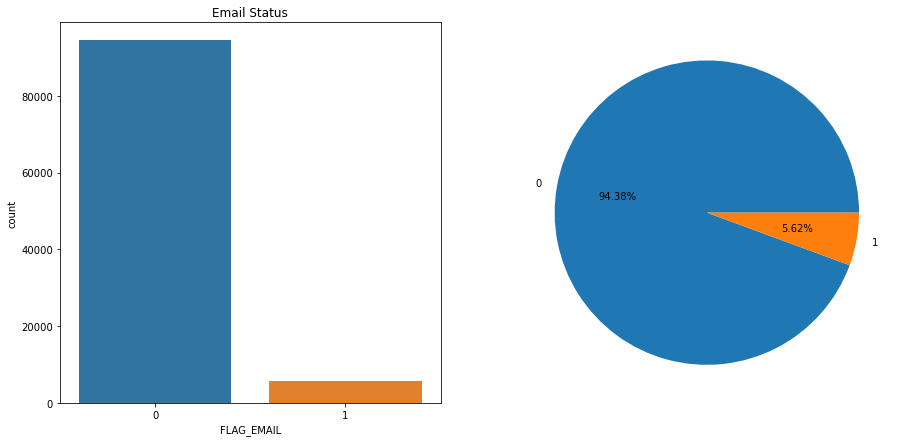

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('Email Status')                  # Set the title of the graph
percentage = df["FLAG_EMAIL"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["FLAG_EMAIL"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion:94.38% of the clients have provide their email.

# Analysis of CNT_FAM_MEMBERS Column

In [28]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1

There are null values in the CNT_FAM_MEMBERS column


In [29]:
mode=df['CNT_FAM_MEMBERS'].mode()[0]

df['CNT_FAM_MEMBERS'].fillna(mode,inplace=True)

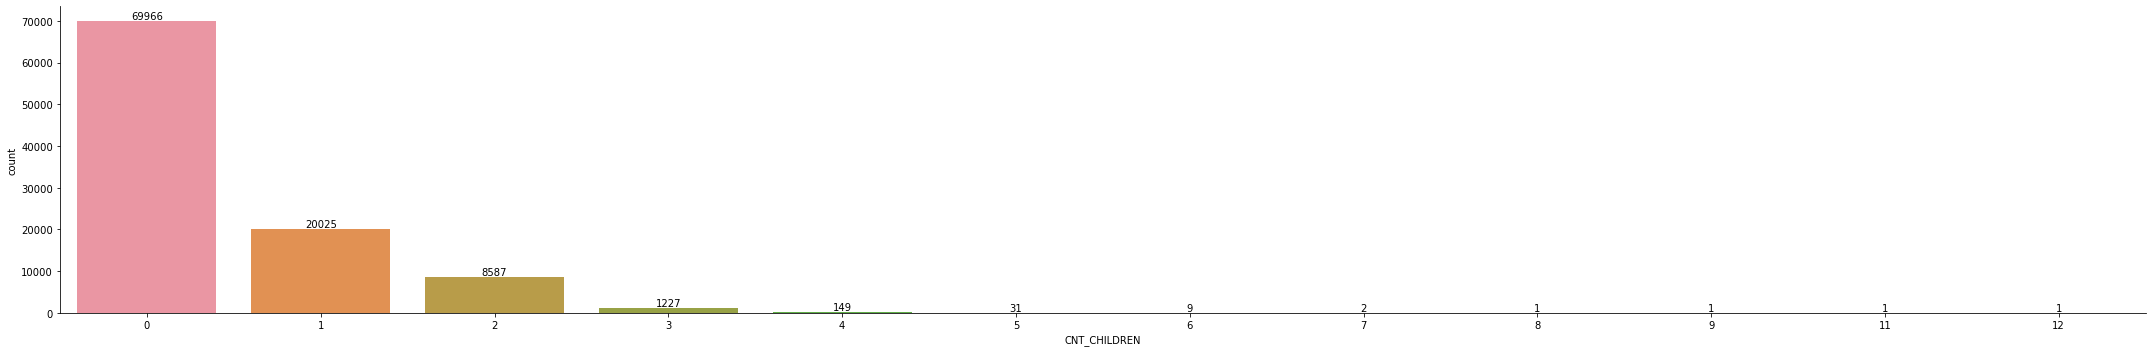

In [30]:
child=sns.catplot(data=df,x = "CNT_CHILDREN",kind='count',aspect=6)
ax = child.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion:Majority of the clients have atmost 3 children

# Analysis of FLAG_EMAIL Column

In [31]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


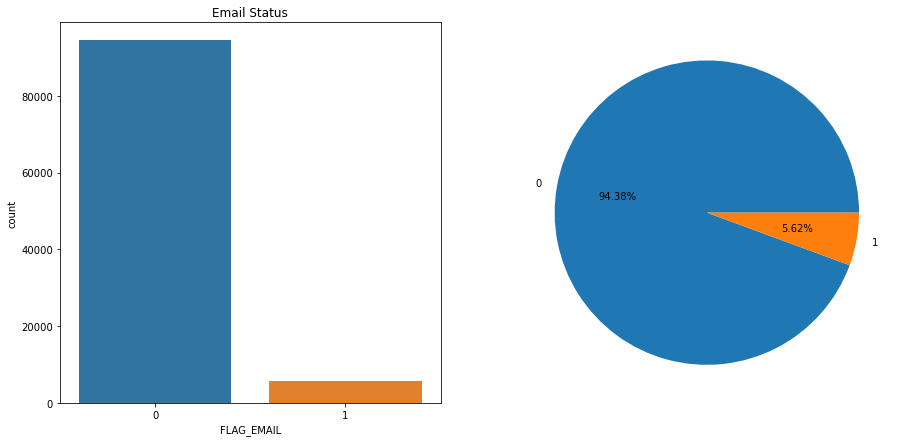

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('Email Status')                  # Set the title of the graph
percentage = df["FLAG_EMAIL"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["FLAG_EMAIL"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion:94.38% of the clients have provide their email.

# Analysis of CNT_FAM_MEMBERS Column

In [33]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 0


In [34]:
mode=df['CNT_FAM_MEMBERS'].mode()[0]

df['CNT_FAM_MEMBERS'].fillna(mode,inplace=True)

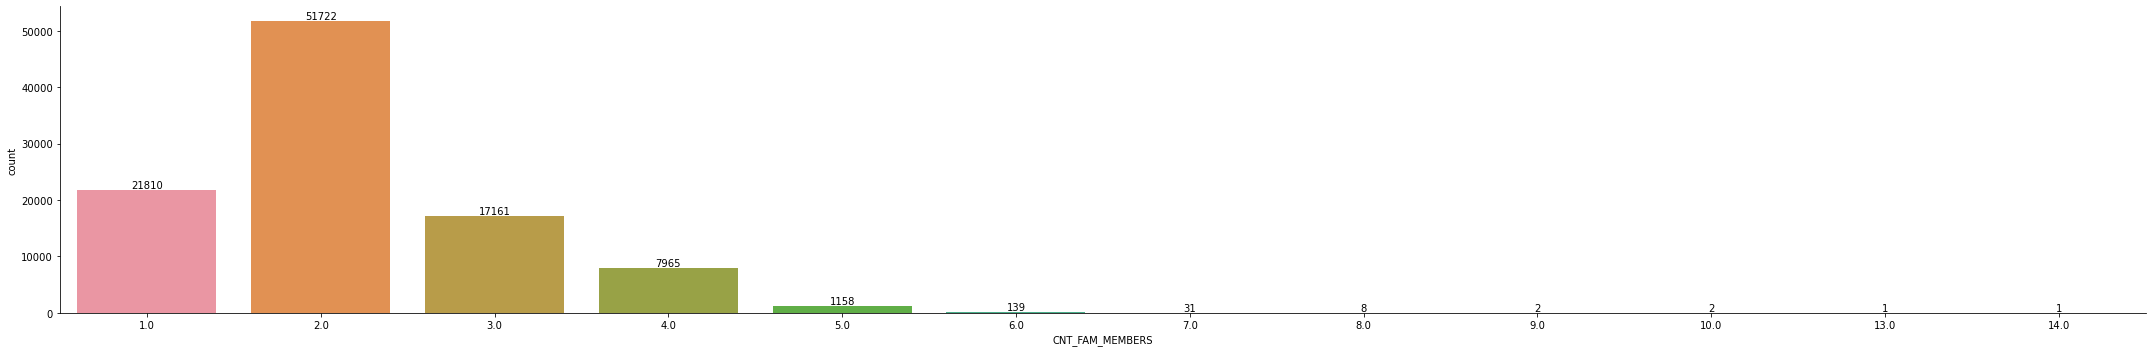

In [35]:
member=sns.catplot(data=df,x = "CNT_FAM_MEMBERS",kind='count',aspect=6)
ax = member.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion:Majority of the clients have atmost 4 family members

# Analysis of TOTAL_DOC_SUBMITTED Column

In [36]:
info_of_cat("TOTAL_DOC_SUBMITTED")

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


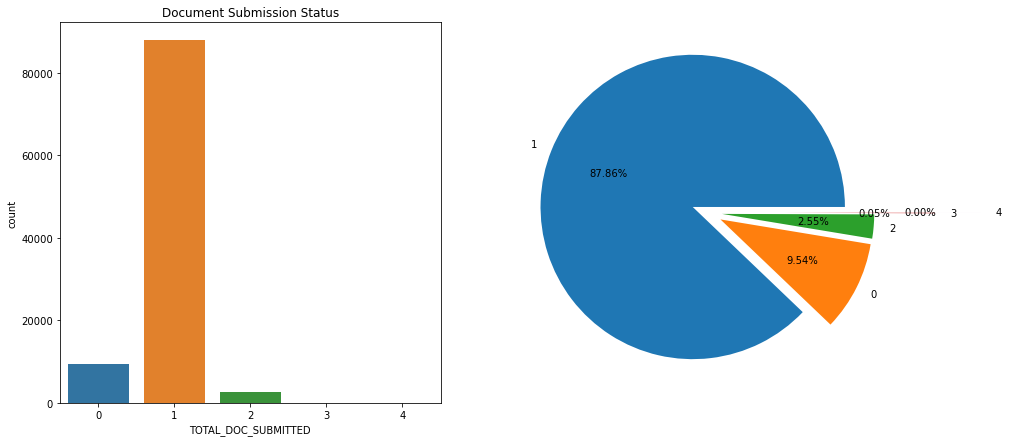

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('Document Submission Status')                  # Set the title of the graph
percentage = df["TOTAL_DOC_SUBMITTED"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TOTAL_DOC_SUBMITTED"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(percentage,labels = labels,explode=[0.1,0.1,0.1,0.5,0.8], autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion:Majority of the clients have submitted only 1 document

# Analysis of NAME_TYPE_SUITE Column

In [38]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405

There are null values in the NAME_TYPE_SUITE column


In [39]:
mode=df['NAME_TYPE_SUITE'].mode()[0]
df['NAME_TYPE_SUITE'].fillna(mode,inplace=True)

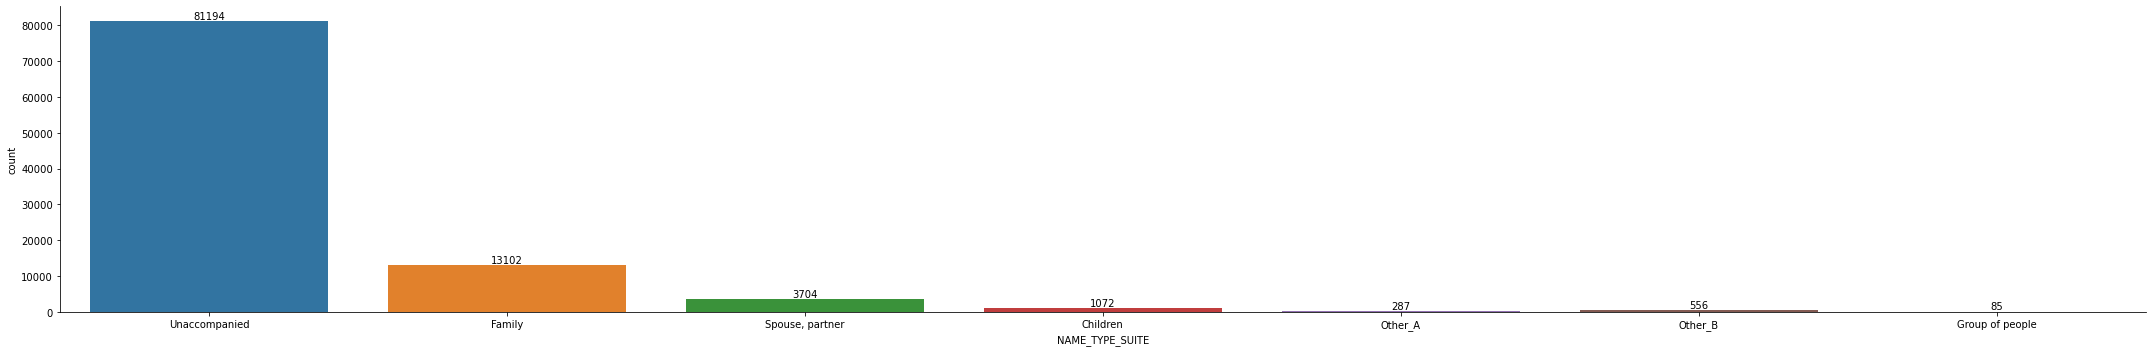

In [40]:
suit=sns.catplot(data=df,x = "NAME_TYPE_SUITE",kind='count',aspect=6)
ax = suit.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion:Majority of clients were unaccompanied at the time loan application

# Analysis of NAME_EDUCATION_TYPE Column

In [41]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


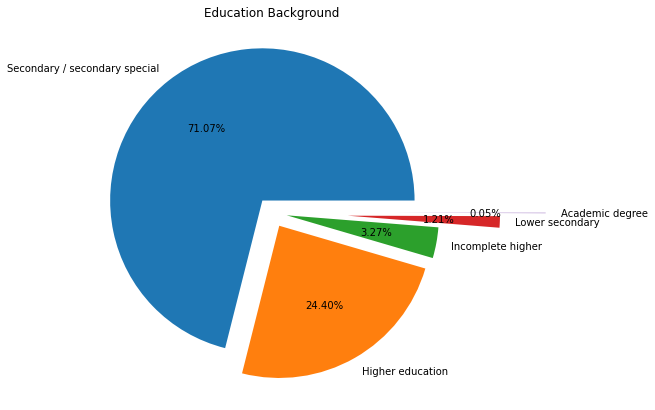

In [42]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Education Background')                  # Set the title of the graph
percentage = df["NAME_EDUCATION_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_EDUCATION_TYPE"].value_counts().index) # Converting the index of value counts into list


plt.pie(percentage,labels = labels,explode=[0.1,0.1,0.1,0.5,0.8], autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion: Majority of the clients(71.07%) are secondary school passed out.

# Analysis of NAME_FAMILY_STATUS Column

In [43]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


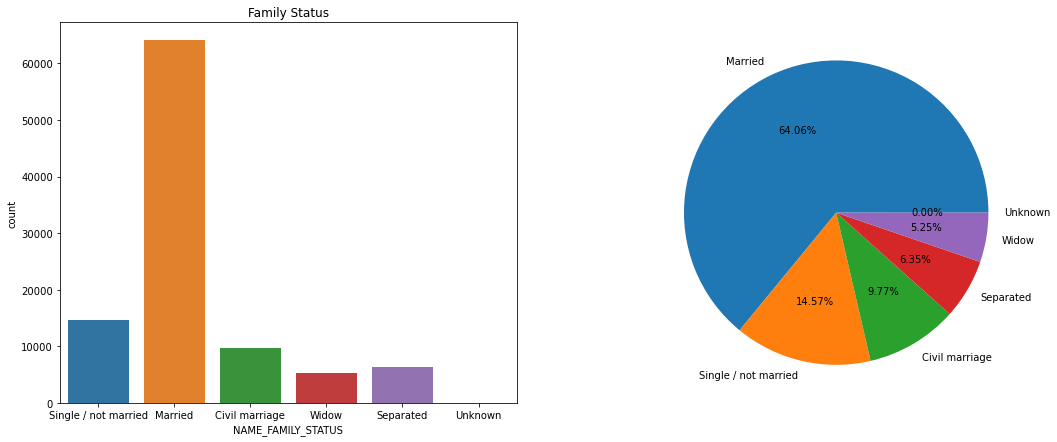

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
ax[0].set_title('Family Status')                  # Set the title of the graph
percentage = df["NAME_FAMILY_STATUS"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_FAMILY_STATUS"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["NAME_FAMILY_STATUS"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Conclusion: Majority of Clients are married

# Continuous Data

In [45]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")

# Analysis of AMT_INCOME_TOTAL column

In [46]:
info_of_numerical('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

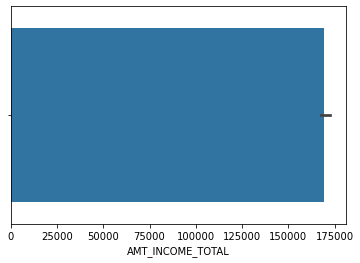

In [47]:
sns.barplot(x = df["AMT_INCOME_TOTAL"])

# Analysis of AMT_CREDIT column

In [48]:
info_of_numerical('AMT_CREDIT')

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264


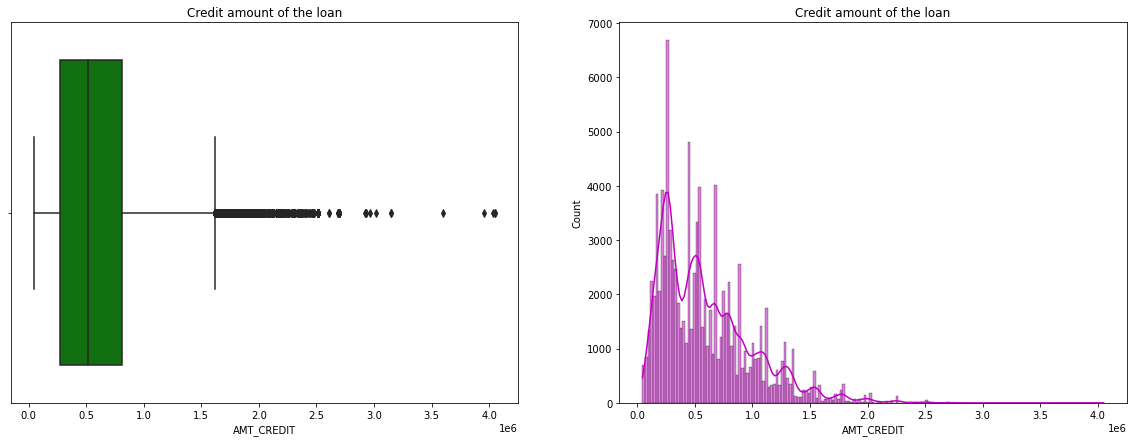

In [49]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))    
ax[0].set_title('Credit amount of the loan')
ax[1].set_title('Credit amount of the loan')

sns.histplot(x = df["AMT_CREDIT"], ax =ax[1],kde=True, color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 

plt.show()

### Conclusion:

Average credit amount is around 6 lacs with the majority of clients having credit amount less than 6 lacs.

The distribution for Credit Amount is right skewed.

# Analysis of AMT_GOODS_PRICE column

In [50]:
info_of_numerical('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765


In [51]:
df['AMT_GOODS_PRICE'].fillna(538345.14,inplace=True)

In [52]:
info_of_numerical('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489633996
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369248.0867594684


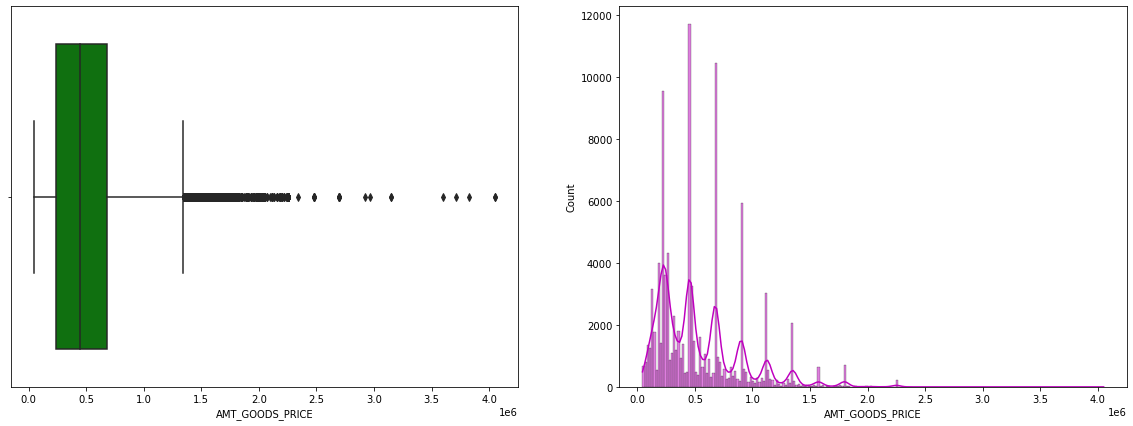

In [53]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_GOODS_PRICE"],kde=True,ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
plt.show()

## Conclusion:

Average Goods Price amount credited to customers is around 5.5 lacs with the majority of clients having Goods Price amount equal to5lacs.

The distribution for Goods Price amount is right skewed.

# Analysis of DAYS_EMPLOYED column

In [54]:
info_of_numerical('DAYS_EMPLOYED')

The mean of the DAYS_EMPLOYED is 63292.22206
The median of the DAYS_EMPLOYED is -1219.0
The mode of the DAYS_EMPLOYED is 365243
The standard deviation of the DAYS_EMPLOYED is 140839.69729599176


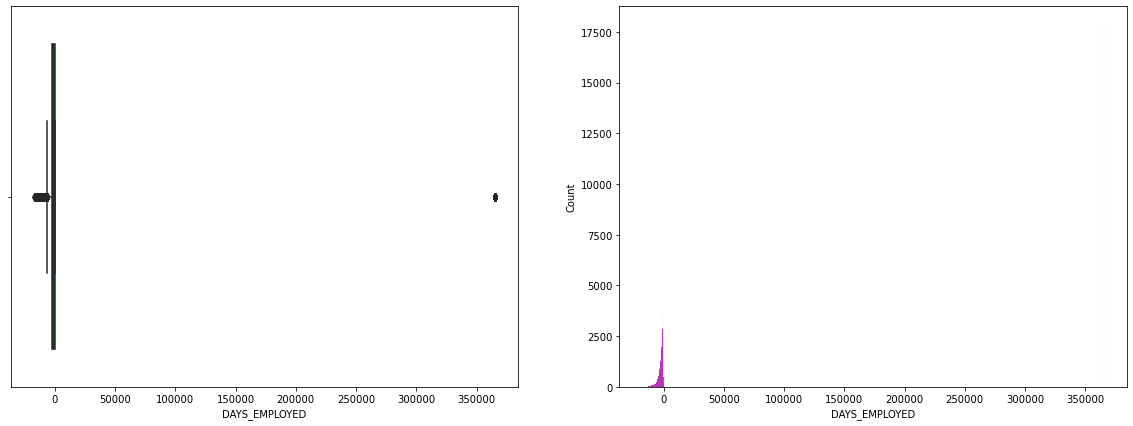

In [55]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
plt.show()

In [56]:
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
#absolute value always +ve.

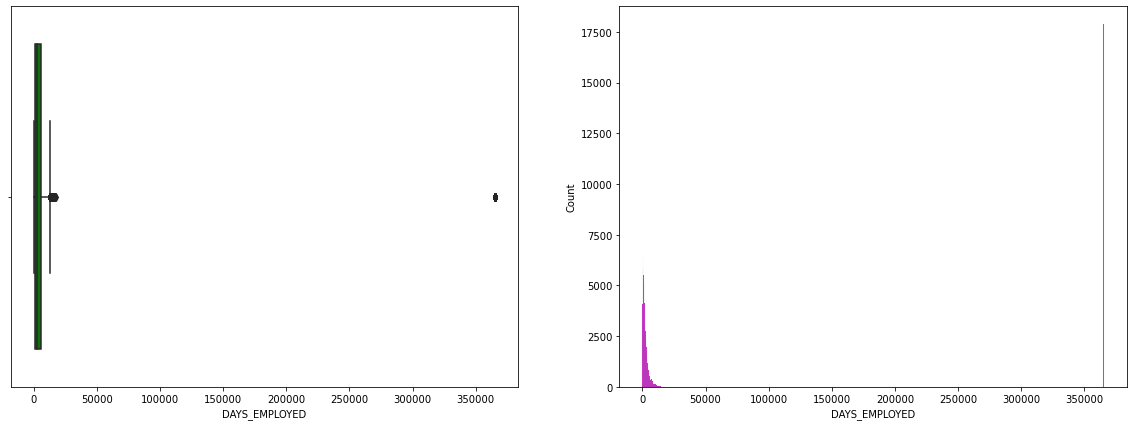

In [57]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
plt.show()

# Level2=Bivarient Analysis


In [58]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [59]:
# 1: DEFAULTER
# 0: REGULAR

# Analysis of Gender wise count of defaulters

posx and posy should be finite values
posx and posy should be finite values


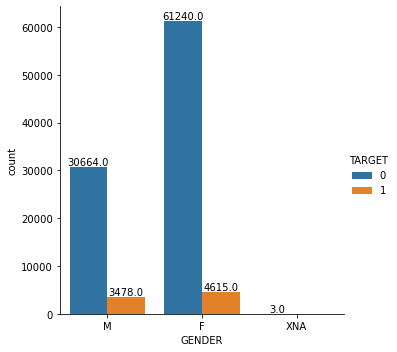

In [60]:
c=sns.catplot(data=df,x='GENDER',hue='TARGET',kind='count')
ax = c.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

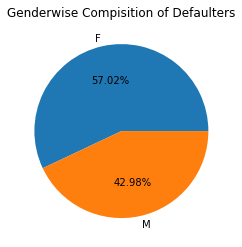

In [61]:
df2=df[df.TARGET==1]['GENDER'].value_counts()
plt.pie(df2,labels=df2.index,autopct='%.2f%%')
plt.title('Genderwise Compisition of Defaulters')
plt.show()

In [62]:
ed=pd.crosstab(index=df['GENDER'],columns=df['TARGET'],margins=True)
ed['Defaulters %']=(ed[1]/ed['All'])*100

In [63]:
ed.drop('All',axis=0,inplace=True)

In [64]:
ed

TARGET,0,1,All,Defaulters %
GENDER,,,,
F,61240,4615,65855,7.007820
M,30664,3478,34142,10.186867
XNA,3,0,3,0.000000


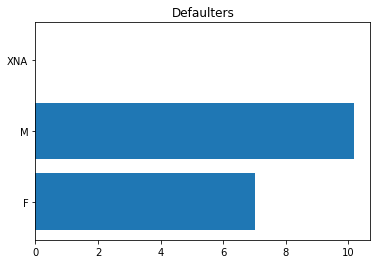

In [65]:
plt.title('Defaulters')
plt.barh(y=ed.index,width=ed['Defaulters %']);

### Conclusion:

1)More number of female customers are found to be defaulters as compared to male customers.

2)Also as the count of Female is high then , the count of females who are doing the payment regularly is also high.

3)However gender wise Defaulter % is higher for female

In [66]:
df2=df[df.TARGET==1]

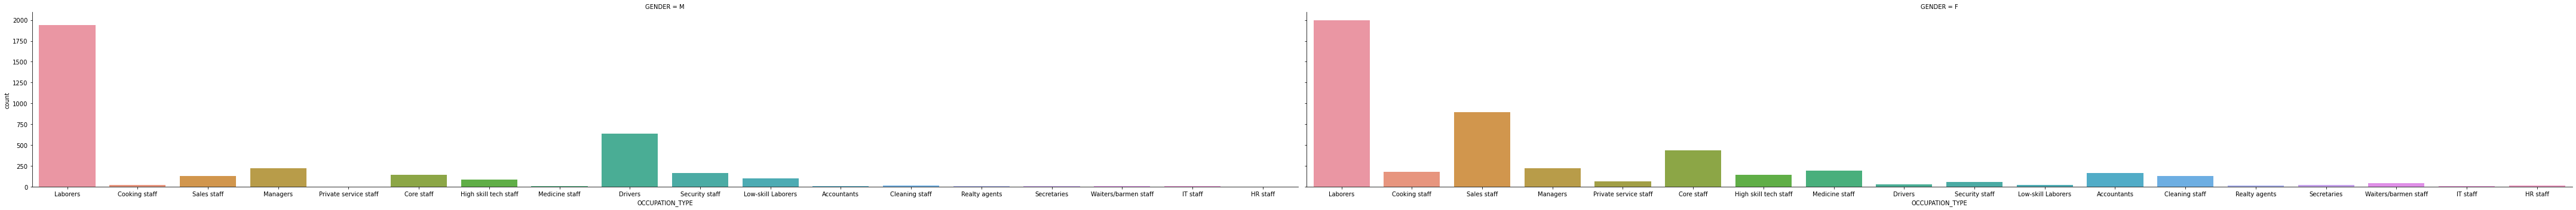

In [67]:
sns.catplot(data=df2,x='OCCUPATION_TYPE',kind='count',col='GENDER',aspect=6);

### Conclusion: Maximum Male and Female , who work as Laborer are defaulters.

# Analysis of House and Cars

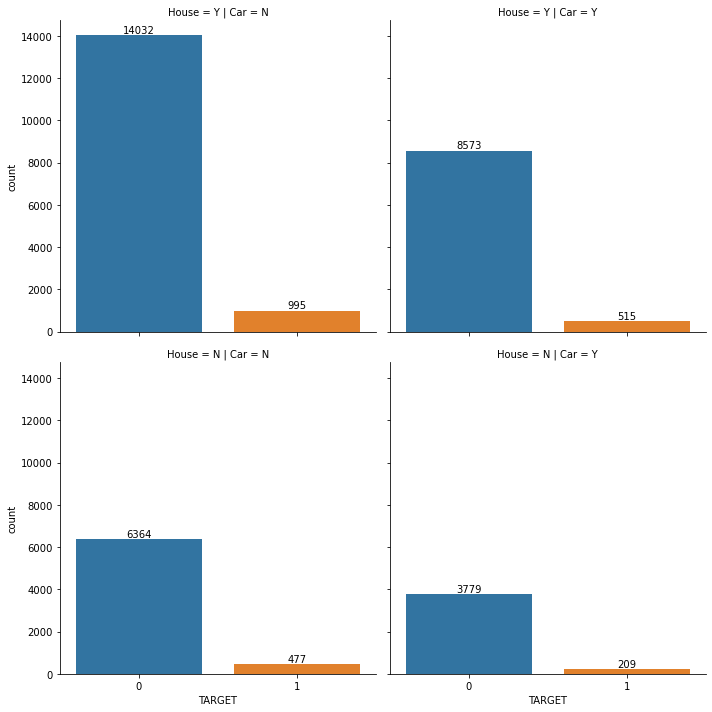

In [114]:
df1=df[(df.DAYS_EMPLOYED>2000)]
c=sns.catplot(data=df1,x='TARGET',row='House',col='Car',kind='count')
ax = c.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')
ax = c.facet_axis(0,1)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')
ax = c.facet_axis(1,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')
ax = c.facet_axis(1,1)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion:

1)Among the Customers who are irregular with payments ,the ones who own only car but not house are less in number. whereas the customers who own house but not car are very likely to be defaulters.

In [112]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


# Analysis of Education Type with Target

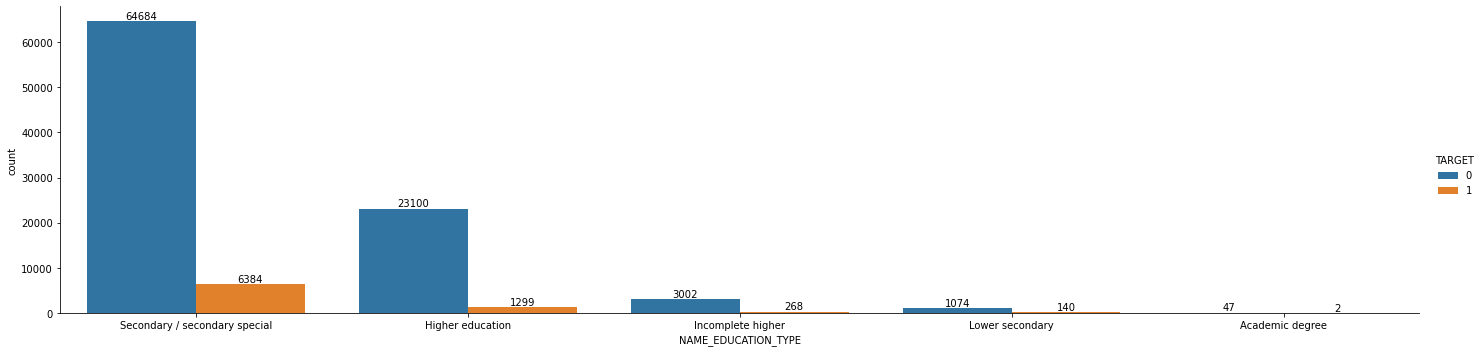

In [69]:
d=sns.catplot(data=df,x='NAME_EDUCATION_TYPE',hue='TARGET',kind='count',aspect=4)
ax = d.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')


### Conclusion:Majority of customers who have completed their secondary/secondary special education

In [70]:
ed1=pd.crosstab(index=df['NAME_EDUCATION_TYPE'],columns=df['TARGET'],margins=True)
ed1['%Defaulters']=(ed1[1]/ed1['All'])*100

In [71]:
ed1.drop('All',axis=0,inplace=True)

In [72]:
ed1

TARGET,0,1,All,%Defaulters
NAME_EDUCATION_TYPE,,,,
Academic degree,47,2,49,4.081633
Higher education,23100,1299,24399,5.323989
Incomplete higher,3002,268,3270,8.195719
Lower secondary,1074,140,1214,11.532125
Secondary / secondary special,64684,6384,71068,8.982946


<BarContainer object of 5 artists>

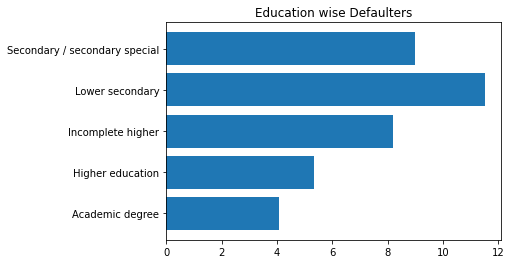

In [73]:
plt.title('Education wise Defaulters')
plt.barh(y=ed1.index,width=ed1['%Defaulters'])

### Conclusion: Percentage composition wise Lower secondary passed out clients has a higher percentage of defaulters.

# Analysis of Types Loans

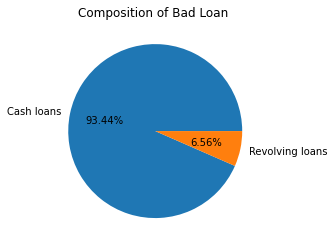

In [74]:
count=df[df['TARGET']==1]['NAME_CONTRACT_TYPE'].value_counts()

plt.pie(data=count,x=count,labels=count.index,autopct="%.2f%%")
plt.title('Composition of Bad Loan ')
plt.show()

### Conclusion: Almost 94% of the loan given to the customers who are making irregular payments is Cash loan.

# Analysis of Total Documents Submitted


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


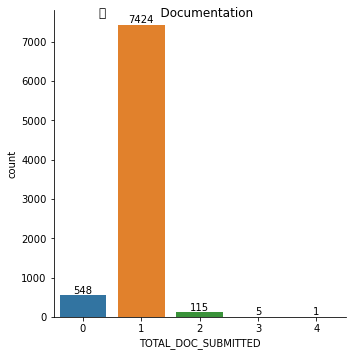

In [75]:
doc=sns.catplot(data=df2,x='TOTAL_DOC_SUBMITTED',kind='count')
doc.fig.suptitle('\t              Documentation')
ax = doc.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion:Majority of defaulters have submitted just one document.As the number of Documents submitted increases
the count of Defaulters decreases.

posx and posy should be finite values
posx and posy should be finite values


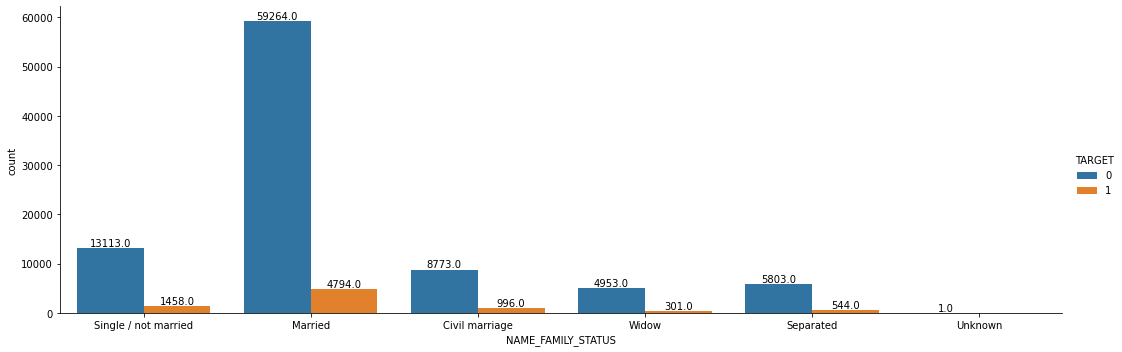

In [76]:
f=sns.catplot(data=df,x='NAME_FAMILY_STATUS',hue='TARGET',kind='count',aspect=3)
ax = f.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

### Conclusion: As per the maritial status most number of married customers are defaulters.

In [77]:
marital=pd.crosstab(index=df['NAME_FAMILY_STATUS'],columns=df['TARGET'],margins=True)
marital['%Defaulters']=(marital[1]/marital['All'])*100

In [78]:
marital.drop('All',axis=0,inplace=True)

<BarContainer object of 6 artists>

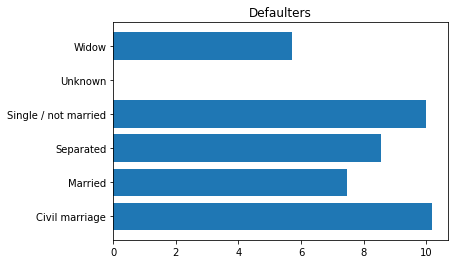

In [79]:
plt.title('Defaulters')
plt.barh(y=marital.index,width=marital['%Defaulters'])

### Conclusion: Clients who had Civil Marriage forms a majority of Defaulters.

#### Analysis of income type

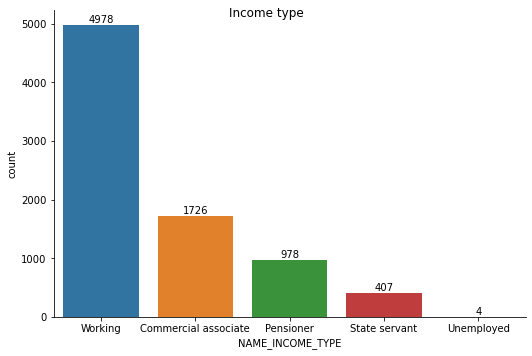

In [80]:
a=sns.catplot(data=df2,x='NAME_INCOME_TYPE',kind='count',aspect=1.5)
a.fig.suptitle('Income type')
ax = a.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

# OCCUPATION TYPE

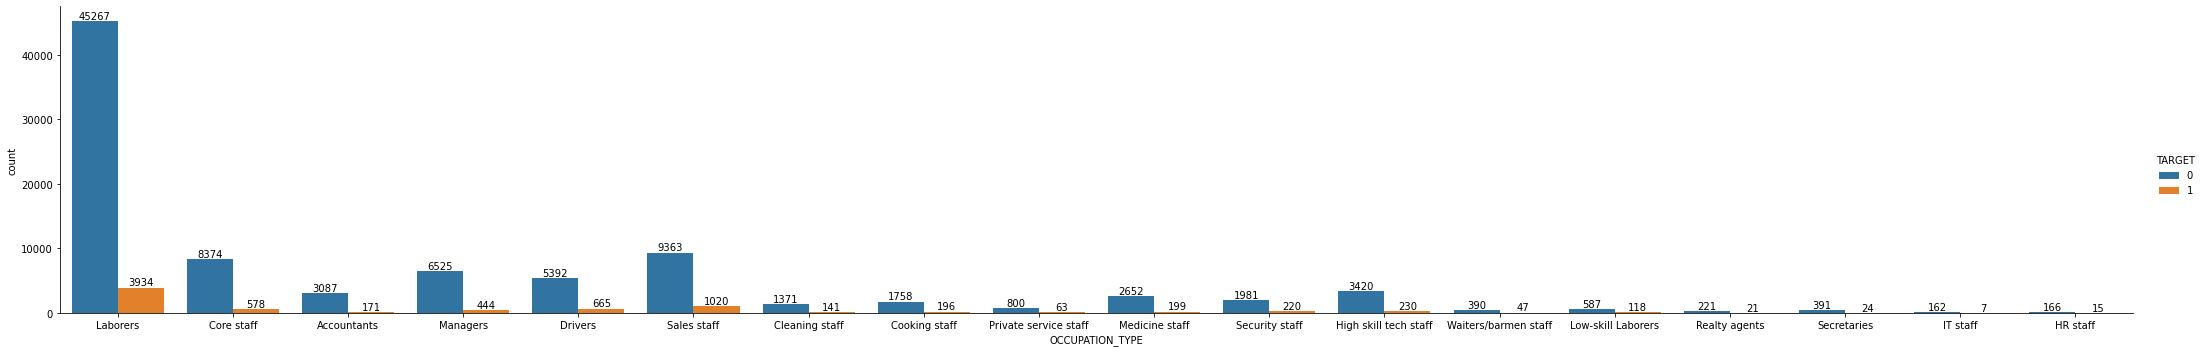

In [81]:
g=sns.catplot(data=df,x='OCCUPATION_TYPE',hue='TARGET',kind='count',aspect=6)
ax = g.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')


### Conclusion:Laborers form a major chunk of defaulters, whereas IT staff are regular with their payments the most.

In [82]:
occ=pd.crosstab(index=df['OCCUPATION_TYPE'],columns=df['TARGET'],margins=True)
occ['%Defaulters']=(occ[1]/occ['All'])*100
a=occ['%Defaulters'].sort_values(ascending=False)
a

OCCUPATION_TYPE
Low-skill Laborers       16.737589
Drivers                  10.979033
Waiters/barmen staff     10.755149
Cooking staff            10.030706
Security staff            9.995457
Sales staff               9.823750
Cleaning staff            9.325397
Realty agents             8.677686
HR staff                  8.287293
All                       8.093000
Laborers                  7.995772
Private service staff     7.300116
Medicine staff            6.980007
Core staff                6.456658
Managers                  6.371072
High skill tech staff     6.301370
Secretaries               5.783133
Accountants               5.248619
IT staff                  4.142012
Name: %Defaulters, dtype: float64

In [83]:
occ.drop('All',axis=0,inplace=True)

Text(0.5, 1.0, 'Occupation wise defaulters')

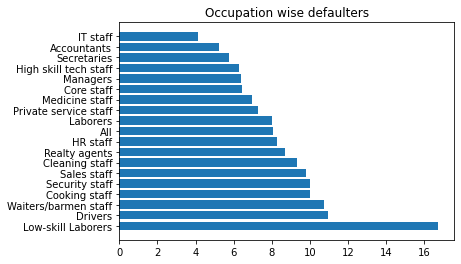

In [84]:
plt.barh(y=a.index,width=a);
plt.title('Occupation wise defaulters')

### Conclusion: Occupation wise Low skill Laborers (%wise) forms a majority of defaulters.

# INCOME of clients

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

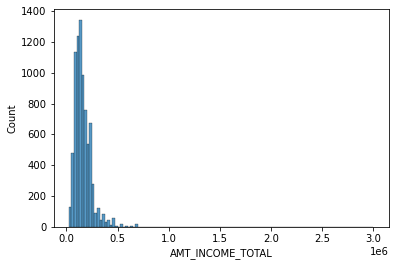

In [85]:

k=np.linspace(25000,3000000,120)
df2=df2[df2.AMT_INCOME_TOTAL<3000000]
sns.histplot(data=df2,x='AMT_INCOME_TOTAL',bins=k)

#### Analysis those who have low annual income from credit amount

In [86]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,Laborers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,586,1,1,0,1,0,Laborers,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,Laborers,2.0,SATURDAY,1


In [87]:
inc=df2[(df2['TOTAL_DOC_SUBMITTED']>=2)]
inc

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,774000.0,...,602,1,1,0,1,0,Laborers,2.0,MONDAY,2
2282,102673,1,Cash loans,M,Y,Y,0,270000.0,900000.0,900000.0,...,276,1,1,0,1,0,Drivers,2.0,TUESDAY,2
2718,103172,1,Cash loans,F,Y,N,2,270000.0,343800.0,225000.0,...,269,1,1,0,1,0,Core staff,4.0,FRIDAY,2
2823,103296,1,Cash loans,F,N,N,0,135000.0,373500.0,225000.0,...,836,1,1,0,1,0,Core staff,2.0,SATURDAY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97030,212627,1,Cash loans,M,Y,N,0,540000.0,2039013.0,1822500.0,...,594,1,1,0,1,0,Managers,2.0,WEDNESDAY,2
97076,212688,1,Cash loans,F,Y,N,1,108000.0,225000.0,225000.0,...,1110,1,1,0,1,0,Core staff,2.0,THURSDAY,2
98048,213837,1,Revolving loans,M,N,N,0,202500.0,270000.0,270000.0,...,381,1,1,1,1,0,Laborers,1.0,TUESDAY,2
98592,214471,1,Revolving loans,M,N,N,1,135000.0,270000.0,270000.0,...,2355,1,1,0,0,0,Laborers,3.0,WEDNESDAY,2


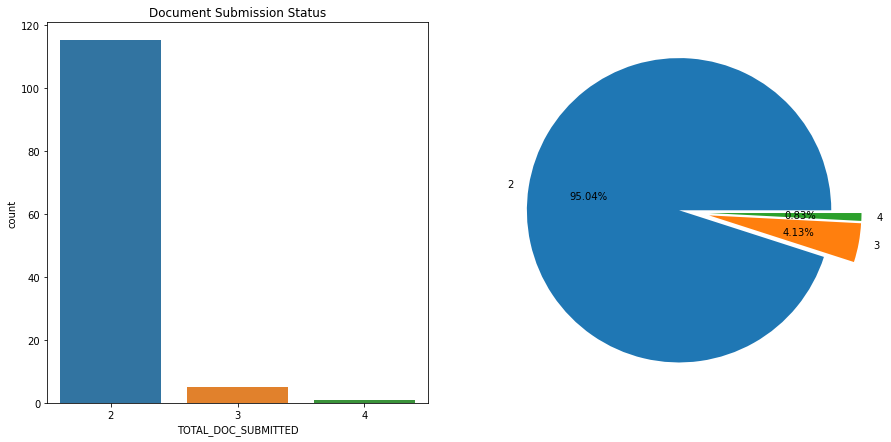

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title('Document Submission Status')                  # Set the title of the graph
percentage = inc["TOTAL_DOC_SUBMITTED"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(inc["TOTAL_DOC_SUBMITTED"].value_counts().index) # Converting the index of value counts into list
f=sns.countplot(x = inc["TOTAL_DOC_SUBMITTED"], ax = ax[0])

plt.pie(percentage,labels = labels,explode=[0.1,0.1,0.1], autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


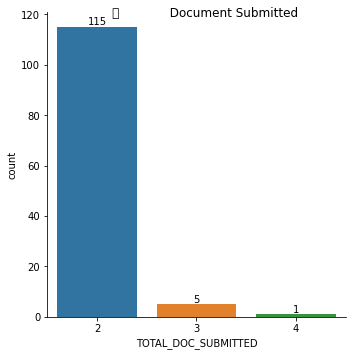

In [90]:
doc=sns.catplot(data=inc,x='TOTAL_DOC_SUBMITTED',kind='count')
doc.fig.suptitle('               \t             Document Submitted')
ax = doc.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

#### Bins for income

In [136]:
bins=[0, 0.2, 0.5, 0.8, 0.9, 1]
labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']
df2['AMT_INCOME_TYPE'] = pd.qcut(df2.AMT_INCOME_TOTAL, q=bins, labels=labels)

bins=[0, 0.2, 0.5, 0.8, 0.9, 1]
labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']
df2['AMT_CREDIT'] = pd.qcut(df2.AMT_CREDIT, q=bins, labels=labels)

Text(0.5, 1.0, 'credit type categories')

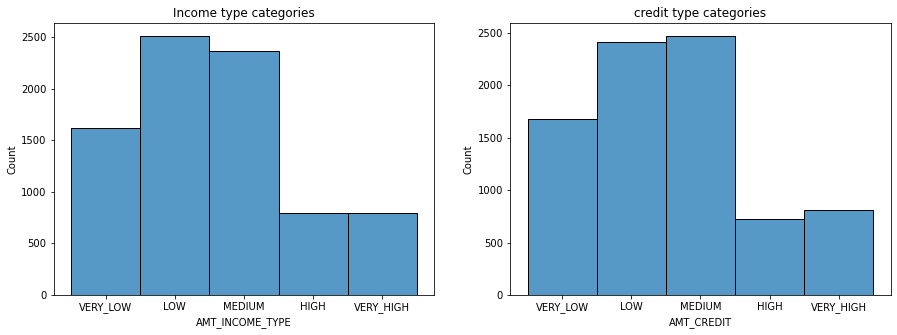

In [137]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(x=df2['AMT_INCOME_TYPE'],ax=ax[0])
ax[0].set_title('Income type categories')
sns.histplot(x=df2['AMT_CREDIT'],ax=ax[1])
ax[0].set_title('Income type categories')
ax[1].set_title('credit type categories')


In [ ]:
df1['AMT_INCOME_TOTAL'].describe()

In [ ]:
df3=df

In [92]:
df['DAYS_EMPLOYED'].describe()

count    100000.000000
mean      67209.101840
std      139013.154867
min           0.000000
25%         930.000000
50%        2203.000000
75%        5671.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [165]:
df.drop(df.index[df['DAYS_EMPLOYED']==365243.000000],inplace=True)

In [166]:
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])

In [94]:
df['DAYS_EMPLOYED'].describe()

count    82135.000000
mean      2384.415767
std       2343.317910
min          0.000000
25%        766.000000
50%       1650.000000
75%       3165.000000
max      17531.000000
Name: DAYS_EMPLOYED, dtype: float64

In [98]:
df_targ=df[(df['TARGET']==1)&(df['DAYS_EMPLOYED']>2000)&(df['Car']=='N')&(df['House']=='Y')]
df_targ

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,166500.0,...,7676,1,1,0,1,0,Private service staff,1.0,TUESDAY,1
235,100273,1,Cash loans,F,N,Y,0,157500.0,1710000.0,1710000.0,...,9274,1,1,0,1,0,Medicine staff,2.0,WEDNESDAY,0
389,100452,1,Cash loans,M,N,Y,1,171000.0,1009566.0,904500.0,...,2046,1,1,1,1,0,Laborers,3.0,FRIDAY,1
603,100690,1,Cash loans,F,N,Y,1,135000.0,244998.0,175500.0,...,3815,1,1,0,1,0,Laborers,3.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,215420,1,Cash loans,F,N,Y,0,112500.0,298512.0,270000.0,...,2867,1,1,0,1,0,Sales staff,2.0,THURSDAY,1
99721,215768,1,Cash loans,M,N,Y,1,270000.0,269550.0,225000.0,...,2194,1,1,0,1,0,Laborers,3.0,THURSDAY,1
99724,215771,1,Cash loans,F,N,Y,1,202500.0,1546020.0,1350000.0,...,2493,1,1,0,1,0,Laborers,3.0,WEDNESDAY,1
99727,215776,1,Cash loans,F,N,Y,3,315000.0,1096020.0,900000.0,...,2190,1,1,0,1,0,Sales staff,5.0,THURSDAY,1


In [99]:
df_targ=df[(df['TARGET']==1)&(df['DAYS_EMPLOYED']>2000)&(df['Car']=='Y')&(df['House']=='N')]
df_targ

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
974,101127,1,Cash loans,M,Y,N,0,211500.0,835380.0,675000.0,...,2128,1,1,0,1,0,Laborers,2.0,FRIDAY,1
1471,101730,1,Cash loans,F,Y,N,2,90000.0,450000.0,450000.0,...,2067,1,1,0,1,0,Private service staff,4.0,THURSDAY,1
1683,101970,1,Cash loans,M,Y,N,0,315000.0,661702.5,598500.0,...,2026,1,1,0,1,0,Laborers,1.0,FRIDAY,1
2666,103113,1,Revolving loans,M,Y,N,4,45000.0,180000.0,180000.0,...,4636,1,1,1,1,0,Laborers,6.0,WEDNESDAY,0
2947,103438,1,Cash loans,F,Y,N,1,135000.0,1078200.0,900000.0,...,2309,1,1,0,1,0,Medicine staff,3.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97517,213228,1,Cash loans,F,Y,N,0,103500.0,515700.0,337500.0,...,2430,1,1,1,1,0,Laborers,2.0,TUESDAY,1
98382,214220,1,Cash loans,M,Y,N,0,180000.0,755190.0,675000.0,...,3129,1,1,0,1,0,Drivers,2.0,WEDNESDAY,1
98583,214461,1,Cash loans,M,Y,N,0,180000.0,1546020.0,1350000.0,...,3064,1,1,0,1,0,High skill tech staff,2.0,TUESDAY,1
99515,215532,1,Cash loans,M,Y,N,0,225000.0,521280.0,450000.0,...,5434,1,1,0,1,0,Managers,2.0,MONDAY,1


In [100]:
df_targ=df[(df['TARGET']==1)&(df['DAYS_EMPLOYED']>2000)&(df['Car']=='Y')&(df['House']=='Y')]
df_targ

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,900000.0,...,2015,1,1,0,1,0,Laborers,1.0,SUNDAY,1
1165,101373,1,Cash loans,M,Y,Y,0,175500.0,550980.0,450000.0,...,2514,1,1,0,1,0,Laborers,2.0,FRIDAY,1
1403,101646,1,Cash loans,M,Y,Y,1,247500.0,675000.0,675000.0,...,2882,1,1,0,1,0,Drivers,3.0,SUNDAY,1
1528,101796,1,Cash loans,M,Y,Y,1,121500.0,270000.0,270000.0,...,3070,1,1,1,1,0,Laborers,3.0,WEDNESDAY,1
1537,101805,1,Cash loans,F,Y,Y,0,135000.0,450000.0,450000.0,...,3571,1,1,0,1,0,Private service staff,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98678,214578,1,Cash loans,F,Y,Y,1,225000.0,261000.0,261000.0,...,2477,1,1,0,1,1,Core staff,3.0,SATURDAY,1
98908,214846,1,Cash loans,F,Y,Y,0,180000.0,728460.0,675000.0,...,2459,1,1,0,1,0,Laborers,1.0,THURSDAY,1
99061,215014,1,Cash loans,F,Y,Y,1,99000.0,189621.0,144000.0,...,5709,1,1,0,1,0,Laborers,3.0,THURSDAY,1
99362,215363,1,Cash loans,M,Y,Y,0,90000.0,518562.0,463500.0,...,5447,1,1,0,1,0,Drivers,2.0,THURSDAY,1


# conclusion: 
The above 3condition tell us about the employees who are not to be defaulter.

Customers who was working from last 5years and having atleastcar or house or both.

we got 1719 customers who are not be defaulter.

So by calculating the % of the defaulter data out of 8.1% now we got only 6.3% customers are defaulter else 1.7% have less chances to become a defaulter.


If we calculate overall % we get 93% of the customers have less probablity to become a defaulters.

In [91]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


<AxesSubplot:>

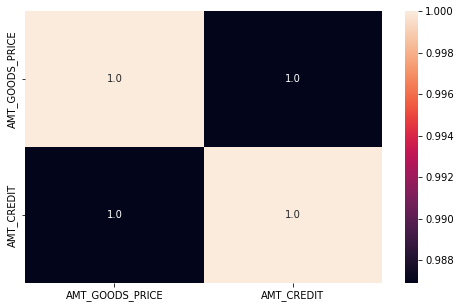

In [153]:
df_heat=df[['AMT_GOODS_PRICE','AMT_CREDIT']].corr()
df_heat
plt.figure(figsize=(8,5))
sns.heatmap(df_heat,annot=True,fmt='.1f')

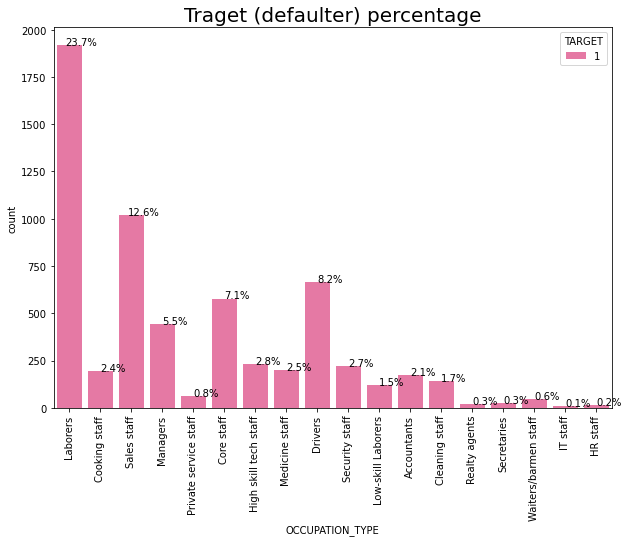

In [155]:
df_target_2=df[df['TARGET']==1]
plt.figure(figsize=(10,7))
total = float(len(df_target_2))
plt.xticks(rotation = 90)
ax = sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=df_target_2,palette='RdPu')
plt.title('Traget (defaulter) percentage', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

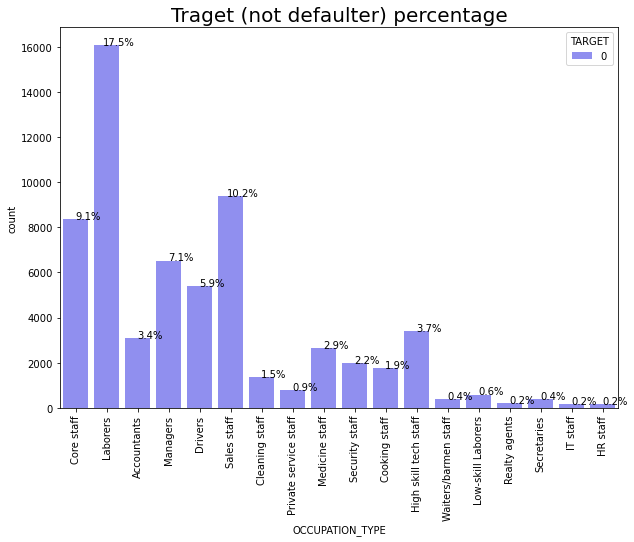

In [157]:
df_target_1=df[df['TARGET']==0]
plt.figure(figsize=(10,7))
total = float(len(df_target_1))
plt.xticks(rotation = 90)
ax = sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=df_target_1,palette='cool')
plt.title('Traget (not defaulter) percentage', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Text(0.5, 0.98, 'Relation between Amounts')

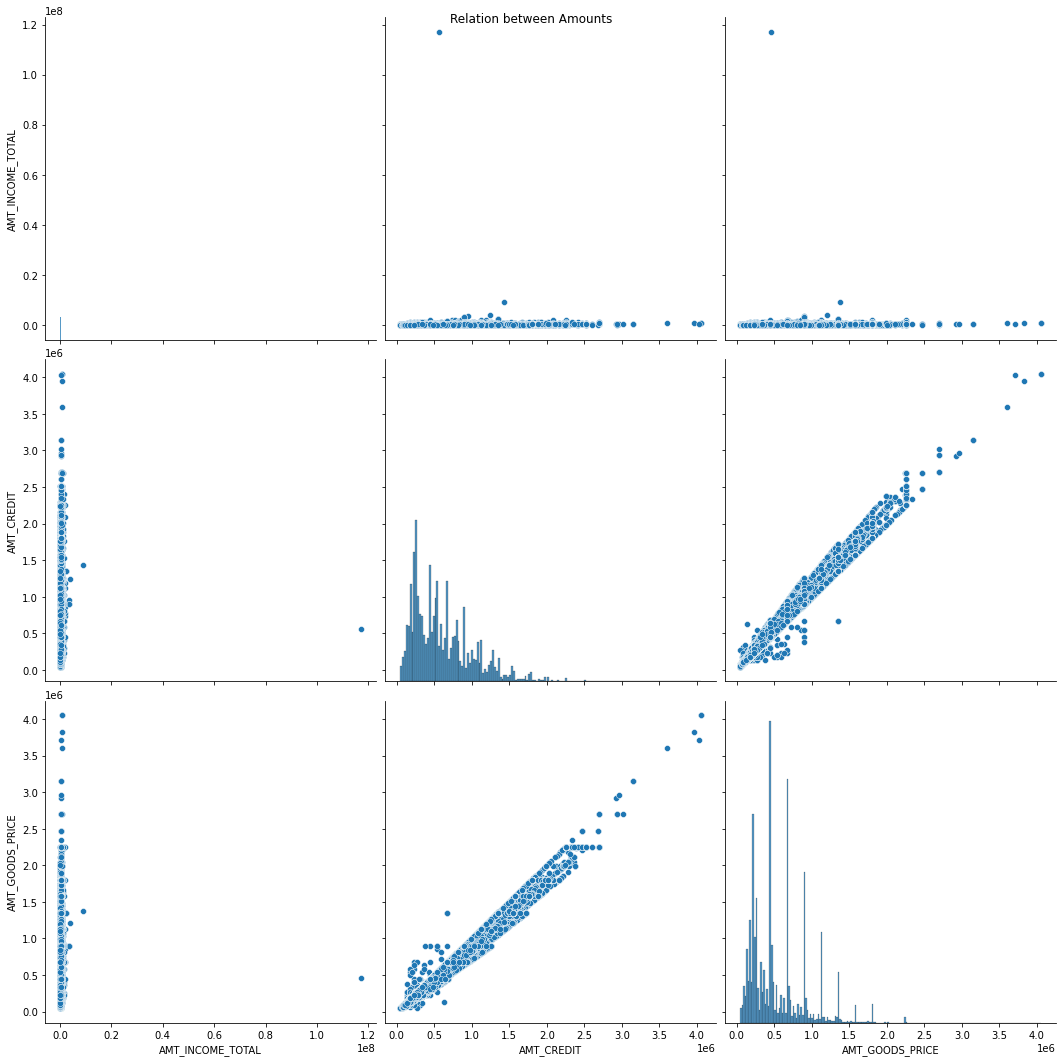

In [179]:
pp=sns.pairplot(data=df, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE'], height = 5);
pp.fig.suptitle('Relation between Amounts')

### amt_credit and amt_goods_price are corelated to each other.
As goods price increases, credit price also increases

In [160]:
datadf=df[df['TARGET']==1]
datadf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,8093.000000,8093.0,8093.000000,8.093000e+03,8.093000e+03,8.085000e+03,8093.000000,8093.0,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000
mean,158350.693068,1.0,0.462622,1.747651e+05,5.566885e+05,4.881529e+05,42709.752873,1.0,0.878537,0.235018,0.998394,0.054368,2.178055,0.948103
std,33450.726941,0.0,0.762922,1.301576e+06,3.405612e+05,3.066783e+05,119877.823725,0.0,0.326685,0.424036,0.040049,0.226756,0.957476,0.287790
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-14285.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129490.000000,1.0,0.000000,1.125000e+05,2.844000e+05,2.385000e+05,-2146.000000,1.0,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,158096.000000,1.0,0.000000,1.350000e+05,4.975200e+05,4.500000e+05,-1031.000000,1.0,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,187688.000000,1.0,1.000000,2.025000e+05,7.451190e+05,6.750000e+05,-374.000000,1.0,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216057.000000,1.0,11.000000,1.170000e+08,3.020760e+06,2.961000e+06,365243.000000,1.0,1.000000,1.000000,1.000000,1.000000,13.000000,4.000000


Text(0.5, 0.98, 'Income type')

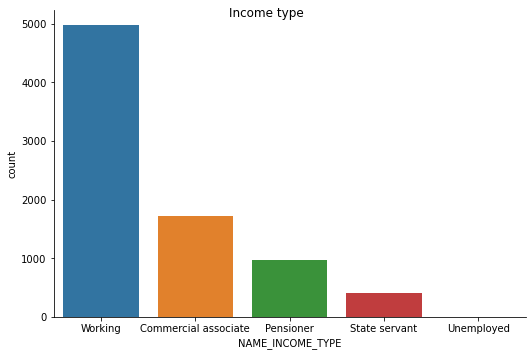

In [162]:
a=sns.catplot(data=datadf,x='NAME_INCOME_TYPE',kind='count',aspect=1.5)
a.fig.suptitle('Income type')

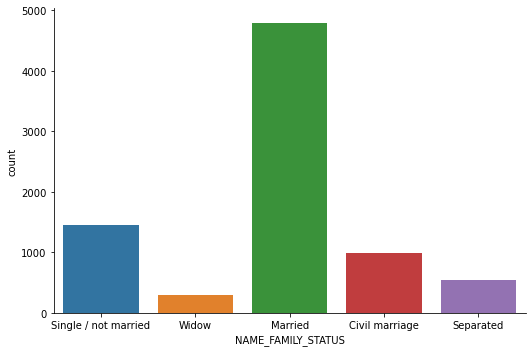

In [161]:
sns.catplot(data=datadf,x='NAME_FAMILY_STATUS',kind='count',aspect=1.5)

### less chances to be defaulter:
66% females are their so they have less chances to be defaulter
clients who are working as a state servants have less chances to be defaulter
clients with medium to high income category have lesschances to be defaulter
Most of the clients are married so they also have less chances to be defaulter

In [ ]:
dataf=df[(df['TARGET']==1)&(df['DAYS_EMPLOYED']>2000)

# Employed Days

In [ ]:
sns.displot(data=df,x=)

In [178]:
pvt=pd.pivot_table(df,index='OCCUPATION_TYPE',columns='TARGET',values='DAYS_EMPLOYED',aggfunc='mean')
pvt

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,2404.352770,2136.678363
Cleaning staff,2159.145150,1784.241135
Cooking staff,2254.366894,1745.994898
Core staff,2837.923095,2183.055363
Drivers,1960.947144,1536.900752
HR staff,2467.012048,2339.400000
High skill tech staff,2750.269883,1962.013043
IT staff,2283.932099,1938.857143
Laborers,2489.290286,1929.362024


Text(0.5, 1.0, 'Occupation wise Count of Employed Days ')

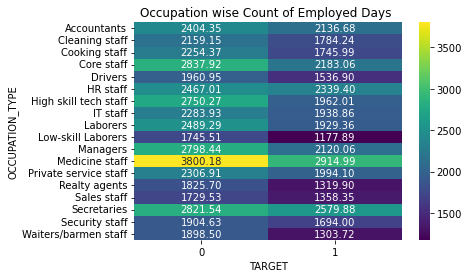

In [173]:
sns.heatmap(pvt,annot=True,fmt='.2f',cmap='viridis')
plt.title('Occupation wise Count of Employed Days ')

### Conclusion:

For customers making the irregular payments, the average employeed days are less than the ones who are regular with their payments.